In [1]:
# preparing package, object, and library
import pandas as pd
import numpy as np 

In [2]:
 #open the csv file 
pd_feature1 = pd.read_csv("data_CKSNAP.csv")
pd_feature2 = pd.read_csv("data_PseKNC.csv")
pd_feature3 = pd.read_csv("data_PSTNPss.csv") # the feature that give the best accuracy

# get the label every feature
y_feature1 = pd_feature1['Target1'] # y_feature1 = y_feature2 = y_feature3 
y_feature2 = pd_feature2['Target2']
y_feature3 = pd_feature3['Target3']

# delete column target
del pd_feature1["Target1"]
del pd_feature2["Target2"]
del pd_feature3["Target3"]

x_feature1 = pd_feature1
x_feature2 = pd_feature2
x_feature3 = pd_feature3

In [3]:
#%run ./best_featureRNA.ipynb 
# merge the feature
# 1. CKSNAP(1) and PseKNC(2)
# 2. CKSNAP and PSTNPss(3)
# 3. PseKNC and PSTNPss
# 4. CKSNAP and PseKNC and PSTNPss
nCV = 5

# don't use numpy array
# 1. CKSNAP and PseKNC
X1 = x_feature1
X2 = x_feature2
y1 = y_feature1
y2 = y_feature2 
X_merge1 = pd.concat([X1,X2], axis=1)

# 2. CKSNAP and PSTNPss(3)
X1 = x_feature1
X2 = x_feature3
y1 = y_feature1
y2 = y_feature3 
X_merge2 = pd.concat([X1,X2], axis=1)

# 3. PseKNC and PSTNPss
X1 = x_feature2
X2 = x_feature3
y1 = y_feature2
y2 = y_feature3 
X_merge3 = pd.concat([X1,X2], axis=1)

# 4. CKSNAP and PseKNC and PSTNPss
X1 = x_feature1
X2 = x_feature2
X3 = x_feature3
y1 = y_feature1  
y2 = y_feature2
y3 = y_feature3 # y1 =y2=y3 =y 

y= y3 
X_merge4 = pd.concat([X1,X2,X3], axis=1)

In [4]:
# When the value of i-th feature are zero, we will delete this feature.
def Delnullfeatures(features):
    list_delete = []
    for i in range(features.shape[1]):
        if sum(features[:,i])==0:
            list_delete.append(i)
    features_new = np.delete(features, list_delete, axis=1)
    return features_new

In [5]:
X_1 = np.array(X_merge1)
X_2 = np.array(X_merge2)
X_3 = np.array(X_merge3)
X_4 = np.array(X_merge4)
features_new1 =Delnullfeatures(features=X_1)
features_new2 =Delnullfeatures(features=X_2)
features_new3 =Delnullfeatures(features=X_3)
features_new4 =Delnullfeatures(features=X_4) 

In [6]:
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
# 1. normalization 
from sklearn.preprocessing import MinMaxScaler


X_train1, X_test1, y_train1,y_test1 = train_test_split(features_new1, y, test_size =0.1, stratify=y)
X_train2, X_test2, y_train2,y_test2 = train_test_split(features_new2, y, test_size =0.1, stratify=y)
X_train3, X_test3, y_train3,y_test3 = train_test_split(features_new3, y, test_size =0.1, stratify=y)
X_train4, X_test4, y_train4,y_test4 = train_test_split(features_new4, y, test_size =0.1, stratify=y)

scaler = MinMaxScaler()
scaler.fit(X_train1)
X_normal1 = scaler.transform(X_train1)
scaler.fit(X_train2)
X_normal2 = scaler.transform(X_train2)
scaler.fit(X_train3)
X_normal3 = scaler.transform(X_train3)
scaler.fit(X_train4)
X_normal4 = scaler.transform(X_train4)

# 2. chi square test 
# 3. LR for generating best feature

In [7]:
f_score1 = chi2(X_normal1,y_train1)
f_score2 = chi2(X_normal2,y_train2)
f_score3 = chi2(X_normal3,y_train3)
f_score4 = chi2(X_normal4,y_train4)

In [8]:
pValue1 = pd.Series(f_score1[1])
pValue2 = pd.Series(f_score2[1])
pValue3 = pd.Series(f_score3[1])
pValue4 = pd.Series(f_score4[1])

In [9]:
def get_bad_features(pValue):
    list_bad_feature=[]
    for i in range(len(pValue)):
        if pValue[i] < 0.86:
            list_bad_feature.append(i)
    return list_bad_feature

list_bad_feature1 = get_bad_features(pValue1)
list_bad_feature2 = get_bad_features(pValue2)
list_bad_feature3 = get_bad_features(pValue3)
list_bad_feature4 = get_bad_features(pValue4)

In [10]:
# reset X_train and X_test , remove the bad feature from dataset 
X_new1 = np.delete(X_train1, list_bad_feature1, axis=1)
X_new2 = np.delete(X_train2, list_bad_feature2, axis=1)
X_new3 = np.delete(X_train3, list_bad_feature3, axis=1)
X_new4 = np.delete(X_train4, list_bad_feature4, axis=1)

X_test1 = np.delete(X_test1, list_bad_feature1, axis=1)
X_test2 = np.delete(X_test2, list_bad_feature2, axis=1)
X_test3 = np.delete(X_test3, list_bad_feature3, axis=1)
X_test4 = np.delete(X_test4, list_bad_feature4, axis=1)

In [11]:
y_train1 = np.array(y_train1)
y_train2 = np.array(y_train2)
y_train3 = np.array(y_train3)
y_train4 = np.array(y_train4)

In [12]:
from sklearn.manifold import TSNE
#from umap import UMAP

In [68]:
X_full_1 = TSNE(n_components=2, learning_rate='auto',
                 init='random', perplexity=5).fit_transform(X_train1)
X_full_2 = TSNE(n_components=2, learning_rate='auto',
                 init='random', perplexity=5).fit_transform(X_train2)
X_full_3 = TSNE(n_components=2, learning_rate='auto',
                 init='random', perplexity=5).fit_transform(X_train3)
X_full_4 = TSNE(n_components=2, learning_rate='auto',
                 init='random', perplexity=5).fit_transform(X_train4)

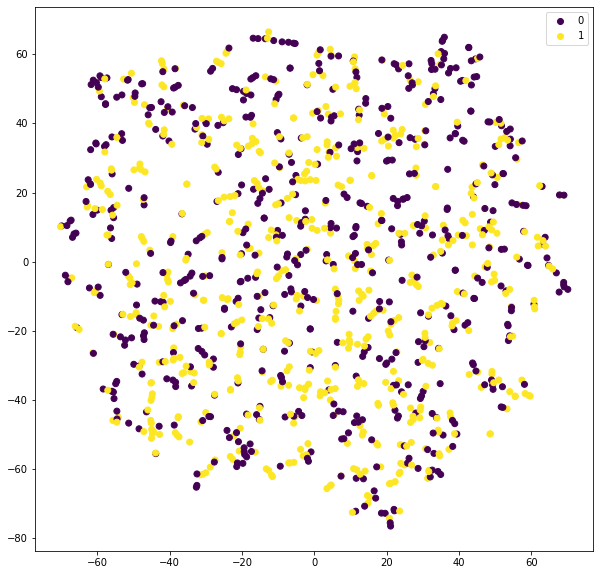

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sc = plt.scatter(X_full_1[:,0], X_full_1[:,1], c= y_train1)
plt.legend(handles = sc.legend_elements()[0], labels =list(range(2)))
plt.show()

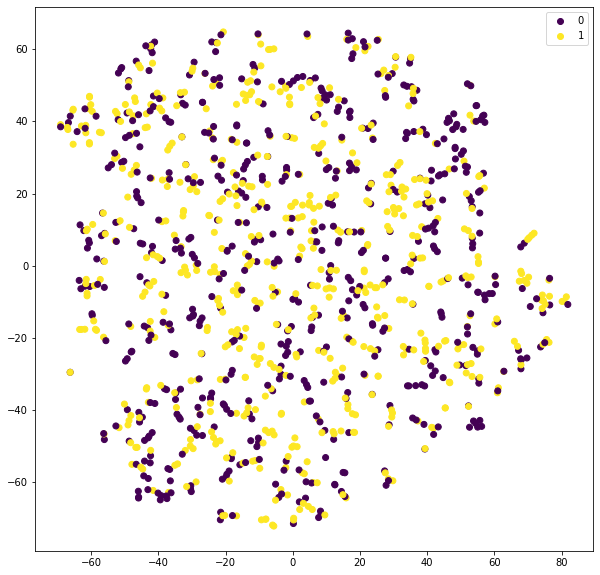

In [70]:
plt.figure(figsize=(10,10))
sc = plt.scatter(X_full_2[:,0], X_full_2[:,1], c= y_train2)
plt.legend(handles = sc.legend_elements()[0], labels =list(range(2)))
plt.show()

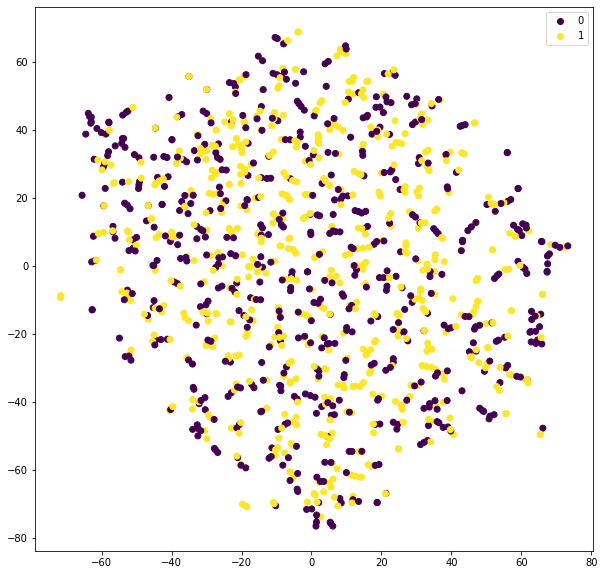

In [71]:
plt.figure(figsize=(10,10))
sc = plt.scatter(X_full_3[:,0], X_full_3[:,1], c= y_train3)
plt.legend(handles = sc.legend_elements()[0], labels =list(range(2)))
plt.show()

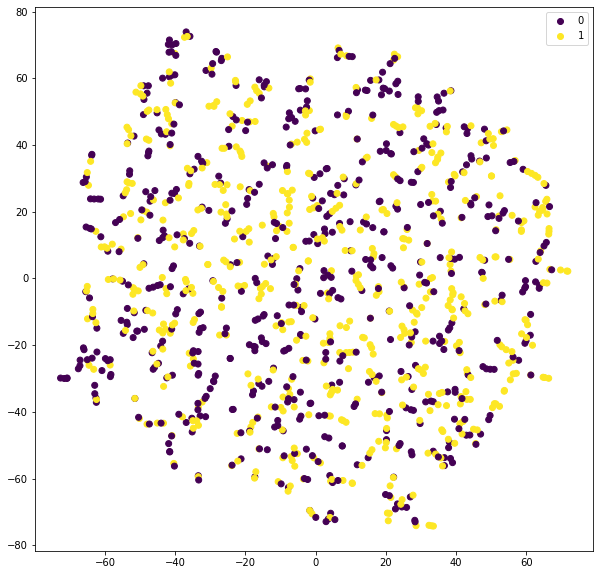

In [72]:
plt.figure(figsize=(10,10))
sc = plt.scatter(X_full_4[:,0], X_full_4[:,1], c= y_train4)
plt.legend(handles = sc.legend_elements()[0], labels =list(range(2)))
plt.show()

In [73]:
# after feature filtering 
X_reduced_1 = TSNE(n_components=2, learning_rate='auto',n_iter=10000,
                 init='random', perplexity=5).fit_transform(X_new1)
X_reduced_2 = TSNE(n_components=2, learning_rate='auto',n_iter=10000,
                 init='random', perplexity=5).fit_transform(X_new2)
X_reduced_3 = TSNE(n_components=2, learning_rate='auto',n_iter=10000,
                 init='random', perplexity=5).fit_transform(X_new3)
X_reduced_4 = TSNE(n_components=2, learning_rate='auto',n_iter=10000,
                 init='random', perplexity=5).fit_transform(X_new4)

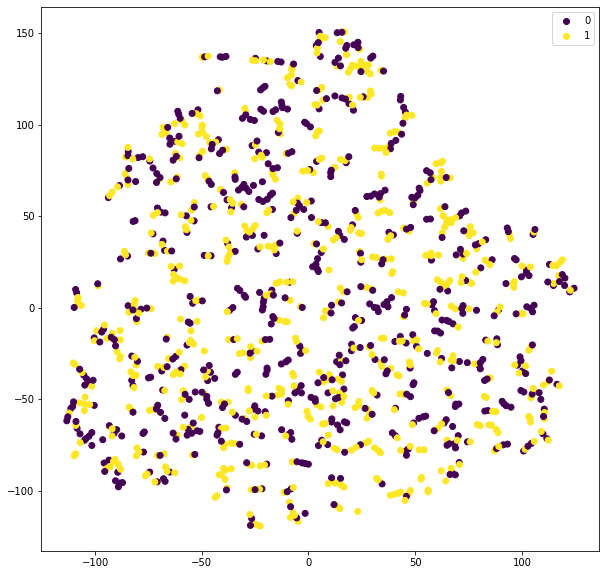

In [74]:
plt.figure(figsize=(10,10))
sc = plt.scatter(X_reduced_1[:,0], X_reduced_1[:,1], c= y_train1)
plt.legend(handles = sc.legend_elements()[0], labels =list(range(2)))
plt.show()

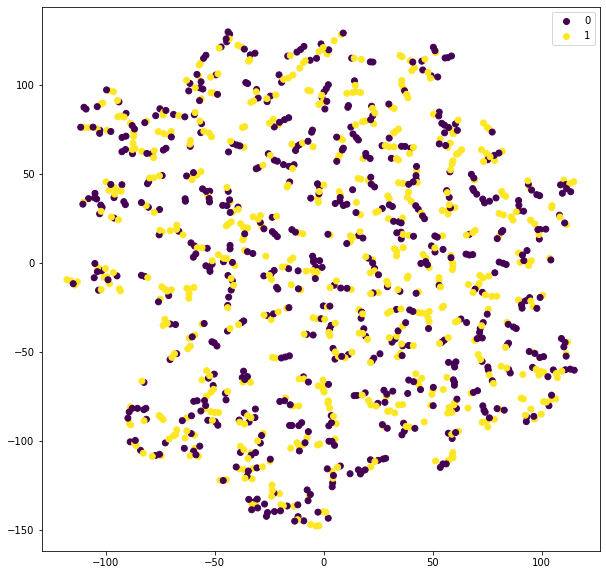

In [75]:
plt.figure(figsize=(10,10))
sc = plt.scatter(X_reduced_2[:,0], X_reduced_2[:,1], c= y_train2)
plt.legend(handles = sc.legend_elements()[0], labels =list(range(2)))
plt.show()

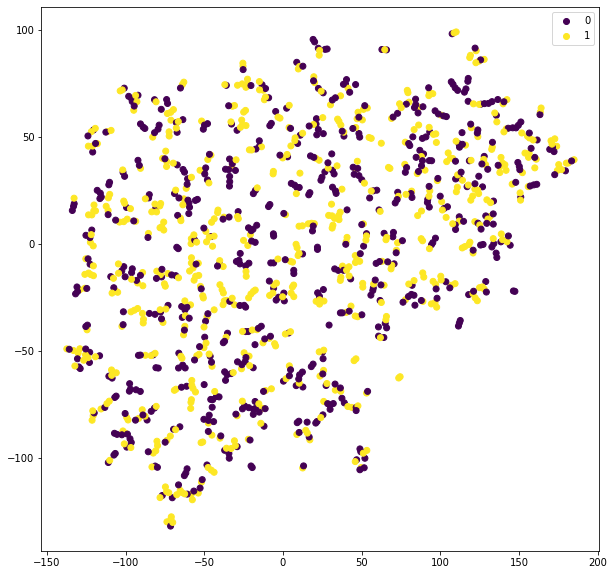

In [76]:
plt.figure(figsize=(10,10))
sc = plt.scatter(X_reduced_3[:,0], X_reduced_3[:,1], c= y_train3)
plt.legend(handles = sc.legend_elements()[0], labels =list(range(2)))
plt.show()

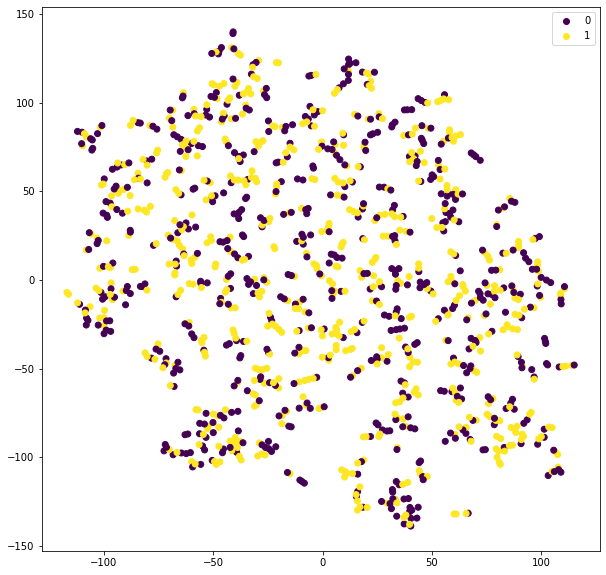

In [77]:
plt.figure(figsize=(10,10))
sc = plt.scatter(X_reduced_4[:,0], X_reduced_4[:,1], c= y_train4)
plt.legend(handles = sc.legend_elements()[0], labels =list(range(2)))
plt.show()